# Churn Prediction - Exploratory Data Analysis (EDA)

This notebook presents the Exploratory Data Analysis (EDA) for a customer churn prediction dataset. Churn prediction is a critical task for businesses to identify customers who are likely to stop using their services, enabling them to take proactive measures to improve customer retention.

In this analysis, we aim to:

- Understand the structure and distribution of the data
- Identify key features that influence customer churn
- Detect missing values, outliers, and data imbalances
- Explore relationships between variables using visualizations
- Gain insights that can guide feature engineering and model development

The insights from this EDA will serve as the foundation for building effective machine learning models for churn prediction.


<h4> <b> Library Imports </b> </h4>

In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from config import data_path

<h4> <b> Understanding Data </b> </h4>

In [6]:
df = pd.read_csv('./../' + data_path)

In [10]:
df.shape

(10000, 14)

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1452,1453,15774882,Mazzanti,687,France,Female,35,3,99587.43,1,1,1,1713.10,1
7265,7266,15692718,Jackson,738,France,Female,38,7,0.00,2,0,0,69227.42,0
7664,7665,15679622,Clayton,602,France,Male,35,8,0.00,1,1,1,22499.29,0
2396,2397,15732476,Ifeanyichukwu,600,France,Female,27,3,0.00,2,0,1,125698.97,0
3411,3412,15815628,Moysey,711,France,Female,37,8,113899.92,1,0,0,80215.20,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df.duplicated().sum()

0

<h4> <b> Univariate Analysis </b> </h4>

In [16]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<h5><b> Categorical Data </b> </h5>

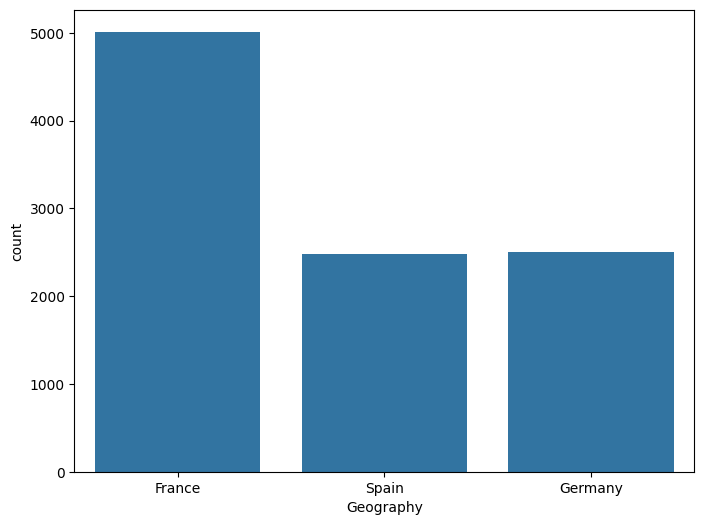

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Geography', data = df)
plt.show()

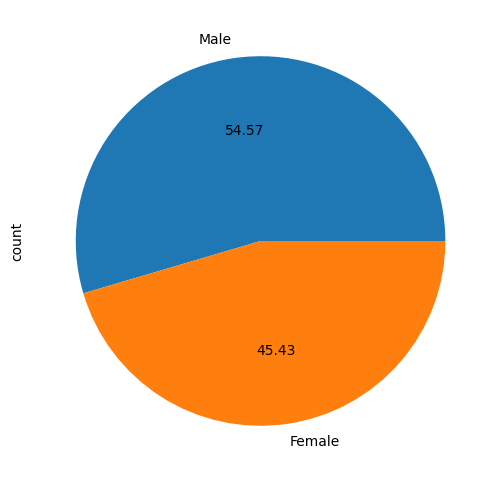

In [36]:
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%0.2f')
plt.show()

<h5><b> Numerical Data </b> </h5>

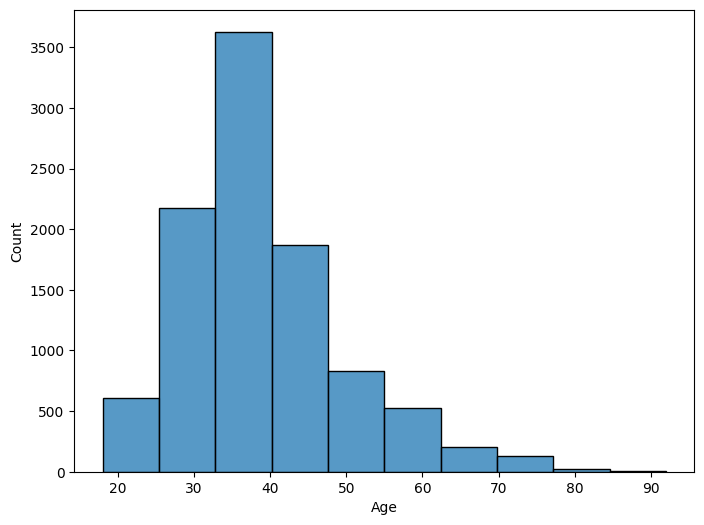

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

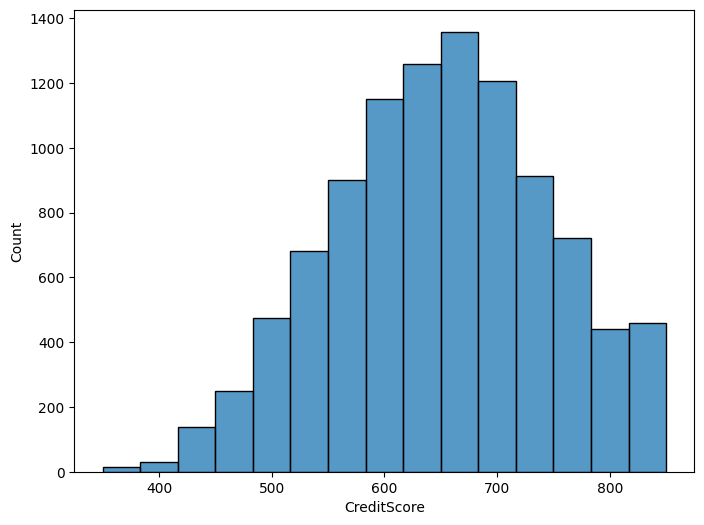

In [47]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CreditScore'], bins=15)
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.show()

<h4> <b> Bivariate Analysis </b> </h4>

In [55]:
df_new = df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
corr_matrix = df_new.corr()

In [56]:
corr_matrix

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Balance,0.006268,0.028308,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


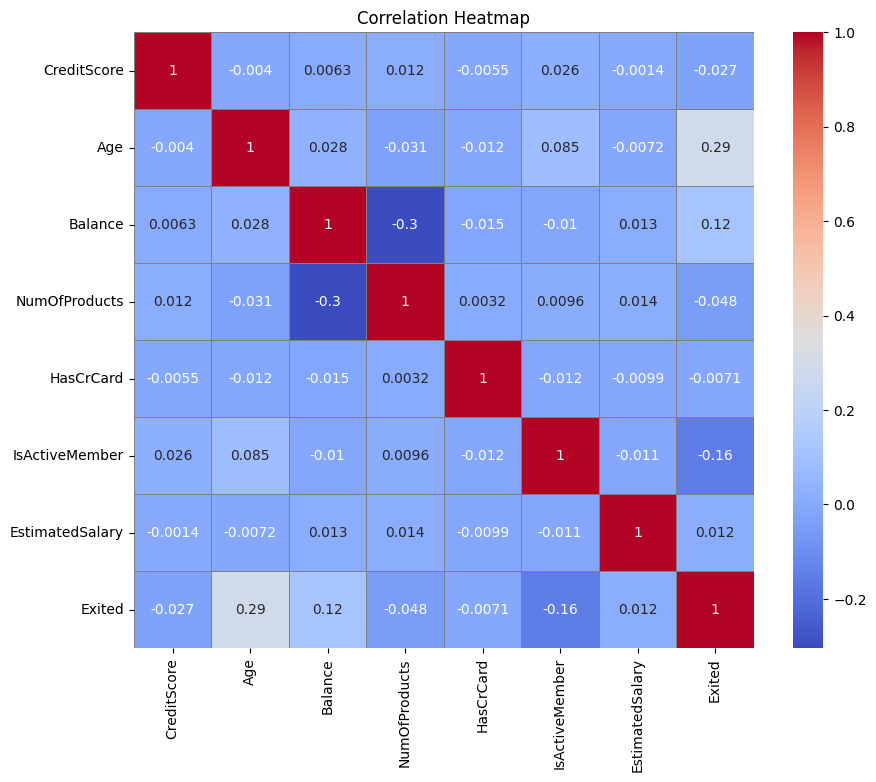

In [60]:
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title("Correlation Heatmap")
plt.show()
